-----------




In a [previous post](./psychology-today-intro.html), I introduced some data I scraped from Psychology Today's [Find A Therapist](https://therapists.psychologytoday.com/rms/?utm_source=PT_Psych_Today&utm_medium=House_Link&utm_campaign=PT_TopNavF_Therapist) directory. The data (and code) can be found in my [github repository](https://github.com/stevenfelix/PsychologyToday).

The first thing I'd like to do with this data is learn a bit more about the providers of therapy in private practice today. Who are they? How were they trained? What degrees do they hold? What issues do they treat? And what methods do they use?

Though simple, these questions are hard to address because traditional data sources typically provide only one or two types of information about providers. Insurance reimbursement data are great for learning about services rendered (length of therapy, types of treatment actually provided) and perhaps about the qualifications of the providers (at least their degree). But, they do not always include a diagnosis (only certain professionals can diagnose), they fail to capture anything about providers who don't accept insurance, and they don't convey any specifics about the providers. Graduation/licensure data are good for describing the number of people eligible to provide therapy (and their respective degrees and certifications), and perhaps what kind of training they received (but not really, since every school is different). But, not everyone in practice has a professional degree (e.g., [life coaches](https://www.psychologytoday.com/blog/women-who-stray/201402/life-coaches-and-mental-illness), and these data still provide only the most general information about providers' training.

Of course, professional profiles on Psychology Today also have their own problems and biases, but I'll address these later. For now, let's learn a little about what type of provider's you're going to find if you were looking for a therapist today on Psychology Today.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import json
import pandas as pd

data = pd.read_csv('../data/therapist_profiles.csv', index_col='id_num')

with open("../data/profiledict.json", "r") as fd:
    profile_dict = json.load(fd)

with open("../data/profilefeatures_bool_dict.json", "r") as fd:
    features_dict = json.load(fd)

In [2]:
def proportions(series):
    return series.value_counts() / len(data)

### Gender

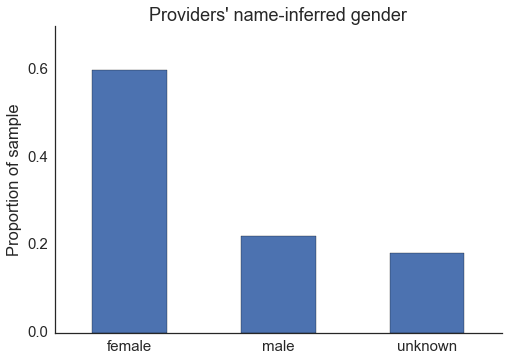

In [3]:
import gender_guesser.detector as gender
d = gender.Detector()
data['gender'] = [d.get_gender(name.split()[0]) for name in data.name]
recodes = {'male': 'male', 'female': 'female', 'mostly_female': 'female', 'mostly_male':'male', 'andy':'unknown','unknown':'unknown'}
gender = proportions(data.gender.map(recodes))

ax = gender.plot(kind = 'bar', yticks = np.arange(0,.75,.2), rot = 0, title = "Providers' name-inferred gender")
ax.set_ylabel("Proportion of sample")
ax.set_ylim(0,.7);
sns.despine()
#ax.set_yticks(np.arange(0,.75,.2));

### Qualifications

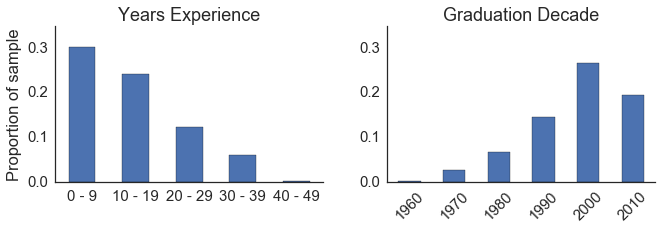

In [4]:
fig,ax = plt.subplots(1,2, figsize = (10,4))

labels = ["{0} - {1}".format(i, i + 9) for i in [0,10,20,30,40]]
data['years_ord'] = pd.cut(data.years, [0,10,20,30, 40, 50], right=False, labels=labels)
years = proportions(data.years_ord)
years.plot(kind = 'bar', rot = 0, title = 'Years Experience', ax =ax[0])
ax[0].set_ylim(0,.35)
ax[0].set_yticks(np.arange(0,.38,.1));
ax[0].set_ylabel('Proportion of sample')

import math
graduated = data.graduated.dropna().apply(lambda x: int(math.floor(x / 10.0)) * 10)
graduated = proportions(graduated).sort_index()
graduated.plot(kind = 'bar', rot = 45, ax = ax[1])
ax[1].set_title('Graduation Decade')
ax[1].set_ylim(0,.35)
ax[1].set_yticks(np.arange(0,.38,.1));


sns.despine()
fig.tight_layout(pad = 2)

In [147]:
## a lot of unknowns!
## unknowns seem to have titles implying groups/centers -- but many profiles
## are still for individuals, they just have names for their private practices
data.gender.map(recodes).value_counts()

female     4588
male       1683
unknown    1386
Name: gender, dtype: int64

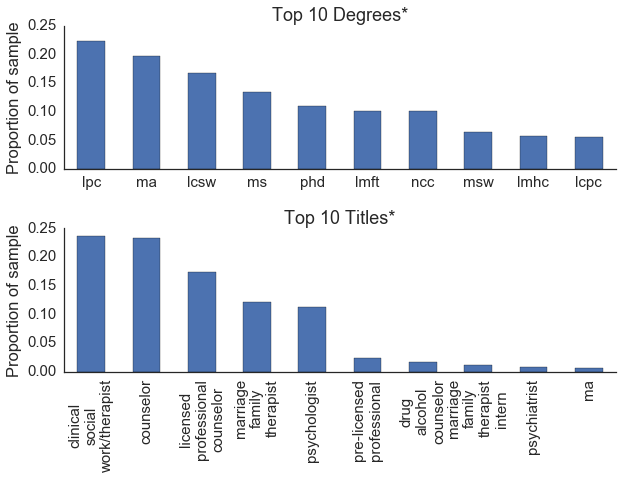

In [262]:
fig,ax = plt.subplots(2,1, figsize=(9,7))

def plot_top10(var, prettytitle, ax, rot = 0):
    top10 = pd.Series(profile_dict[var]['counts']).sort_values(ascending=False).iloc[:10] / len(data)
    top10.plot(kind='bar', ax = ax, rot=rot, title='Top 10 {}'.format(prettytitle))
    labels = ['\n'.join(i.replace('and ','').replace('or ','').split()) for i in top10.index]
    ax.set_xticklabels(labels)
    ax.set_ylabel('Proportion of sample')

plot_top10('degrees','Degrees*', ax[0])

s = proportions(data.title)[:10]
labels = ['\n'.join(i.replace('and ','').replace('or ','').replace('& ','').split()) for i in s.index]
s.plot(kind='bar', rot = 90, ax= ax[1], title = 'Top 10 Titles*')
ax[1].set_xticklabels(labels)
ax[1].set_ylabel('Proportion of sample')

sns.despine()
fig.tight_layout();

 - Significant regional trends in degrees. For instance, LPC degrees are more common in the South, whereas 
 - Examining these 'degrees' as-is is not very accurate, as providers  usually list more than one degree / certification / license (and these are not the same categories) For instance, a provider with a Masters of Social Work may get their Clincal Social Work license (LCSW). For this reason, examining providers' titles may be more enlightening.
 - Over 85% of providers have one of 5 titles: clinical social worker, counselor, licensed counselor, marriage/family therapist, or psychologist.
 
**Acronyms*: LPC = Licensed professional counselor; LCSW = Licensed clinical social worker; LMFT = Licenced marital and family counselor; NCC = National certififed counselor; LMHC = Licenced mental health counselor. 

-----------

## Provider specialties, treatment orientations, and issues

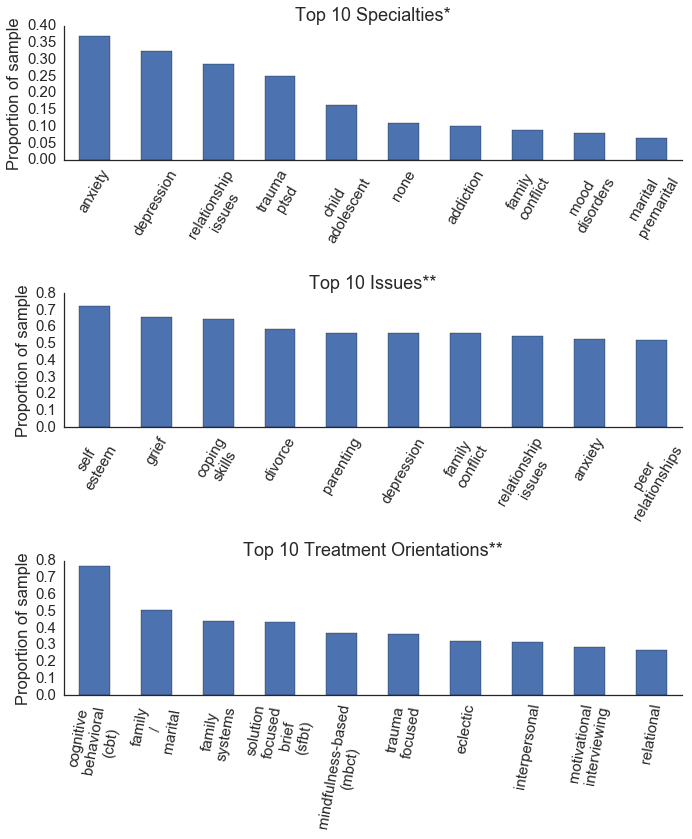

In [265]:
fig,ax = plt.subplots(3,1,figsize = (10,12))

variables = [('specialties','Specialties*', ax[0], 60),
            ('issues', 'Issues**', ax[1], 60),
            ('treatmentorientation', 'Treatment Orientations**', ax[2], 80)]
for tup in variables:
    plot_top10(*tup)

sns.despine()
fig.tight_layout();

 - *Specialties*: anxiety, depression, and relationship issues reign supreme; considering the prevalence of addiction, relatively few providers are considered addiction specialists. This could also be because the majority of addiction specialists may work out of hospitals (ie not in private practice). The northeast also seems to have more anxiety specialists than other regions, particularly the mountain states.
 
 - *Issues*: relationship problems seem to be most common, transdiagnostic issues handled in treatment. This might be a person's relationship with the self (self-esteem), with the deceased (grief), or with ex-spouses and children. This is an interesting twist to think about -- considering the predominant focus of American culture is on personal achievement and independence, people seem to suffer from problems of interdependence. Not much variance across regions.

 - *Treatment orientations*: CBT is king - 70-80% of providers say they provide CBT. And rightfully so. No other treatment orientation has as much empirical support for its effectiveness. The increidbly high number of providers indicating CBT as a treatment orientation should also give us pause. Any person who has visited more than 2 therapists will attest to high degree of variation in therapists' approaches -- even when they say they use the same treatment approach. From this perspective, is it really possible that over 70% of therapists actually provide CBT? In other words -- the high number of providers indicating that they provide CBT indicates that this variable may not actually be that informative. 
  - There are also strong regional trends. The midwest and south are by far the highest endorsers of CBT.  Also, the east and west coast have a disproportionate number of psychoanalysts. This is likely because psychoanalysis is mainly taught in 'hubs' such as New York and Boston.

## Cost and Coverage

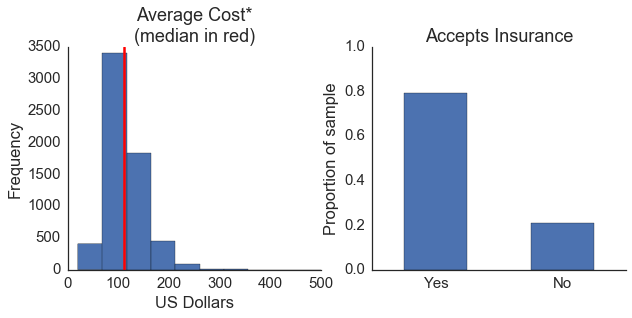

In [237]:
fig, ax = plt.subplots(1,2, figsize = (10, 4))
data.fee.hist(grid = False, ax = ax[0])
ax[0].set_title('Average Cost*\n(median in red)')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('US Dollars')
ax[0].axvline(data.fee.median(),color = 'red')

insurance = proportions(data.insurance.fillna('No'))
insurance.plot(kind = 'bar', title = 'Accepts Insurance', ax = ax[1], ylim=(0,1), rot=0)
ax[1].set_ylabel('Proportion of sample')
sns.despine()

insurance
No     103.074935
Yes    115.886201
Name: fee, dtype: float64

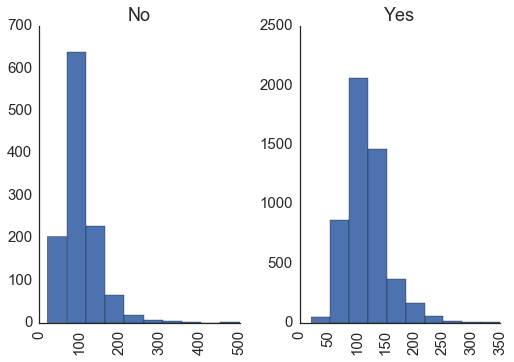

In [269]:
data.fee.hist(grid = False, by = data.insurance.fillna('No'))
sns.despine()
data.groupby(data.insurance.fillna('No')).fee.mean()


--------------------
### Limitations of these data

- Bias: Because this is an opt-in, for-fee service, there is certainly a selection bias in any sample of profiles taken from PT. Profiles are typically created by providers who have a private practice. This means that providers who work out of hospitals or other large treatment centers/organization (e.g., the VA, Kaiser, community clinics) are less likely to have a PT profile. It is also likely that these providers may have a different set of characteristics than those in private practice (perhaps shorter average duration of treatment, more likely to take insurance, more likely to have certain types of degrees and training, more likely to treat more severe forms of psychopathology). As such, PT profile data cannot be used to understand the overall mental health field in the US. It is best thought of as an overview of the private-practice field (and even this is a bit biased, since there are certain clusters of private-practictioners who are less likely to have a PT profile).
